# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Defining Parameters
#### 6. Running and Fitting the forecast model

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warning.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [82]:
# Define path
path = r'C:\Users\muham\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 6\05-10-25 Accident_data_germany_2024_analysis'

In [83]:
# Import Data
df_2024 = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_new.csv'), low_memory= False)

In [80]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268519 entries, 0 to 268518
Data columns (total 35 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0.2                   268519 non-null  int64  
 1   Unnamed: 0.1                   268519 non-null  int64  
 2   Unnamed: 0                     268519 non-null  int64  
 3   OID_                           268519 non-null  int64  
 4   accident_id                    268519 non-null  object 
 5   state                          268519 non-null  int64  
 6   administrative_region          268519 non-null  int64  
 7   administrative_district        268519 non-null  int64  
 8   municipality                   268519 non-null  int64  
 9   year_of_accident               268519 non-null  int64  
 10  month_of_accident              268519 non-null  int64  
 11  hour_of_accident               268519 non-null  int64  
 12  day_of_week                   

In [84]:
file_path = r'C:\Users\muham\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 6\05-10-25 Accident_data_germany_2024_analysis\02 Data\Original Data\Unfallorte2023_LinRef.csv'
df_2023 = pd.read_csv(
    file_path,
    sep=';',            # <-- use semicolon, crucial
    decimal=',',        # <-- German decimal separator
    encoding='utf-8',   # try 'latin1' if utf-8 gives errors
    dtype={'UIDENTSTLAE': str},  # keep long IDs as text
    low_memory=False
)

print("✅ Rows:", len(df_2023))
print("✅ Columns:", len(df_2023.columns))
print("✅ Column names:", df_2023.columns.tolist()[:10])  # first 10 column names
print(df_2023.head(3))

✅ Rows: 269048
✅ Columns: 26
✅ Column names: ['OID_', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG']
   OID_           UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  \
0     1  01230519134013042023      1        0       2          0   2023   
1     2  01230519134013022023      1        0       2          0   2023   
2     3  01230519125013522023      1        0      59        183   2023   

   UMONAT  USTUNDE  UWOCHENTAG  ...  IstPKW  IstFuss  IstKrad  IstGkfz  \
0       5       22           6  ...       1        0        0        0   
1       5       14           6  ...       0        0        0        0   
2       5       13           6  ...       1        0        0        0   

   IstSonstige      LINREFX       LINREFY  XGCSWGS84  YGCSWGS84  PLST  
0            0  574751.5619  6.018283e+06  10.148875  54.306951     1  
1            1  572054.2330  6.018075e+06  10.107378  54.305472     1  
2            0  526666.7270  6

In [64]:
df_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269048 entries, 0 to 269047
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OID_                269048 non-null  int64  
 1   UIDENTSTLAE         269048 non-null  object 
 2   ULAND               269048 non-null  int64  
 3   UREGBEZ             269048 non-null  int64  
 4   UKREIS              269048 non-null  int64  
 5   UGEMEINDE           269048 non-null  int64  
 6   UJAHR               269048 non-null  int64  
 7   UMONAT              269048 non-null  int64  
 8   USTUNDE             269048 non-null  int64  
 9   UWOCHENTAG          269048 non-null  int64  
 10  UKATEGORIE          269048 non-null  int64  
 11  UART                269048 non-null  int64  
 12  UTYP1               269048 non-null  int64  
 13  ULICHTVERH          269048 non-null  int64  
 14  IstStrassenzustand  269048 non-null  int64  
 15  IstRad              269048 non-nul

In [85]:
# Import 2022 data
file_path_1 = r'C:\Users\muham\OneDrive\Desktop\careerfoundry\Data Immersion\Achievement 6\05-10-25 Accident_data_germany_2024_analysis\02 Data\Original Data\Unfallorte2022_LinRef.csv'
df_2022 = pd.read_csv(
    file_path_1,
    sep=';',            # <-- use semicolon, crucial
    decimal=',',        # <-- German decimal separator
    encoding='utf-8',   # try 'latin1' if utf-8 gives errors
    dtype={'UIDENTSTLAE': str},  # keep long IDs as text
    low_memory=False
)

print("✅ Rows:", len(df_2022))
print("✅ Columns:", len(df_2022.columns))
print("✅ Column names:", df_2022.columns.tolist()[:10])  # first 10 column names
print(df_2022.head(3))

✅ Rows: 256492
✅ Columns: 25
✅ Column names: ['OBJECTID', 'UIDENTSTLAE', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE', 'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG']
   OBJECTID           UIDENTSTLAE  ULAND  UREGBEZ  UKREIS  UGEMEINDE  UJAHR  \
0         1  01220204125013262022      1        0      54         84   2022   
1         2  01220529134013152022      1        0      57         44   2022   
2         3  01220508125013982022      1        0      59         73   2022   

   UMONAT  USTUNDE  UWOCHENTAG  ...  IstRad  IstPKW  IstFuss  IstKrad  \
0       2       19           6  ...       1       1        0        0   
1       5       11           1  ...       0       0        0        1   
2       5       12           1  ...       0       1        0        0   

   IstGkfz  IstSonstige        LINREFX       LINREFY  XGCSWGS84  YGCSWGS84  
0        0            0  506085.644000  6.035085e+06   9.093886  54.463396  
1        0            0  593821.621227  6.014332e+06  10.440636  54.268304  

In [66]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256492 entries, 0 to 256491
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   OBJECTID            256492 non-null  int64  
 1   UIDENTSTLAE         256492 non-null  object 
 2   ULAND               256492 non-null  int64  
 3   UREGBEZ             256492 non-null  int64  
 4   UKREIS              256492 non-null  int64  
 5   UGEMEINDE           256492 non-null  int64  
 6   UJAHR               256492 non-null  int64  
 7   UMONAT              256492 non-null  int64  
 8   USTUNDE             256492 non-null  int64  
 9   UWOCHENTAG          256492 non-null  int64  
 10  UKATEGORIE          256492 non-null  int64  
 11  UART                256492 non-null  int64  
 12  UTYP1               256492 non-null  int64  
 13  ULICHTVERH          256492 non-null  int64  
 14  IstStrassenzustand  256492 non-null  int64  
 15  IstRad              256492 non-nul

In [67]:
# creating subset
df_state_2024 = df_2024[df_2024['state_name'] == 'Nordrhein-Westfalen'].copy()

In [68]:
df_state_2023 = df_2023[df_2023['ULAND'] == 5].copy()

In [69]:
df_state_2022 = df_2022[df_2022['ULAND'] == 5].copy()

In [70]:
df_state_2024.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,OID_,accident_id,state,administrative_region,administrative_district,municipality,year_of_accident,...,UTM_Y,Longitude_WGS84,Latitude_WGS84,location_check_level,state_name,population,accidents_in_state,accidents_per_100k,light_condition_label,road_condition_label
22375,22375,22375,22375,22376,05240106506100558976,5,1,16,0,2024,...,5.673195e+06,6.408424,51.181443,1,Nordrhein-Westfalen,17900000,59035,329.804469,twilight,Wet/damp/slippery
22376,22376,22376,22376,22377,05240106502340556094,5,1,13,0,2024,...,5.710558e+06,7.010926,51.529254,1,Nordrhein-Westfalen,17900000,59035,329.804469,daylight,Wet/damp/slippery
22377,22377,22377,22377,22378,05240106502340550432,5,1,13,0,2024,...,5.709652e+06,7.007831,51.521057,1,Nordrhein-Westfalen,17900000,59035,329.804469,daylight,Wet/damp/slippery
22378,22378,22378,22378,22379,05240106502135558500,5,1,13,0,2024,...,5.702653e+06,7.074324,51.459219,1,Nordrhein-Westfalen,17900000,59035,329.804469,darkness,Wet/damp/slippery
22379,22379,22379,22379,22380,05240106501314560452,5,1,12,0,2024,...,5.700235e+06,6.780798,51.432291,1,Nordrhein-Westfalen,17900000,59035,329.804469,darkness,Wet/damp/slippery


In [71]:
df_state_2024=df_state_2024.drop(columns={'Unnamed: 0','Unnamed: 0.1','Unnamed: 0.2'})

In [72]:
df_state_2023.head()

,OID_,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,PLST
22289,22290,05230104502338491451,5,1,13,0,2023,1,7,4,...,1,0,0,0,0,364044.9020,5.705174e+06,7.042066,51.481364,1
22290,22291,05230104502209191002,5,1,13,0,2023,1,0,4,...,0,0,1,0,0,359714.5650,5.700984e+06,6.981407,51.442651,1
22291,22292,05230104501128496007,5,1,12,0,2023,1,3,4,...,1,1,0,0,0,342855.4370,5.702537e+06,6.738320,51.452181,1
22292,22293,05230104500630086652,5,1,12,0,2023,1,14,4,...,1,0,0,0,1,344412.0924,5.706325e+06,6.759038,51.486642,1
22293,22294,05230104500620376414,5,1,70,24,2023,1,15,4,...,1,0,0,0,0,338217.7278,5.700537e+06,6.672545,51.432908,1


In [73]:
df_state_2022.head()

,OBJECTID,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84
21952,21953,05220104701300981305,5,5,62,14,2022,1,10,3,...,0,1,0,0,0,0,360680.084000,5.715158e+06,6.989691,51.570258
21960,21961,05220102314310890123,5,9,66,20,2022,1,16,1,...,0,1,0,0,0,0,434107.735000,5.661197e+06,8.058955,51.098473
21961,21962,05220103503000479412,5,1,24,0,2022,1,17,2,...,0,1,1,0,0,0,375377.715329,5.681730e+06,7.213407,51.273267
21967,21968,05220105702100074642,5,5,15,0,2022,1,6,4,...,1,1,0,0,0,0,403014.173248,5.758686e+06,7.588150,51.970389
21985,21986,05220106516300389264,5,1,58,28,2022,1,7,5,...,1,0,0,0,0,0,348557.556167,5.684142e+06,6.828160,51.288441


In [74]:
df_state_2022 = df_state_2022.rename(columns={'OBJECTID': 'OID_'})


In [75]:
df_state_2022['year_of_accident'] = df_state_2022['UJAHR']
df_state_2022['month_of_accident'] = df_state_2022['UMONAT']

df_state_2023['year_of_accident'] = df_state_2023['UJAHR']
df_state_2023['month_of_accident'] = df_state_2023['UMONAT']


In [76]:
# merging data sets from all three years
df_all_nrw = pd.concat([df_state_2022, df_state_2023, df_state_2024], ignore_index=True)

In [77]:
df_all_nrw.head()

,OID_,UIDENTSTLAE,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,UTM_Y,Longitude_WGS84,Latitude_WGS84,location_check_level,state_name,population,accidents_in_state,accidents_per_100k,light_condition_label,road_condition_label
0,21953,05220104701300981305,5.0,5.0,62.0,14.0,2022.0,1.0,10.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21961,05220102314310890123,5.0,9.0,66.0,20.0,2022.0,1.0,16.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21962,05220103503000479412,5.0,1.0,24.0,0.0,2022.0,1.0,17.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21968,05220105702100074642,5.0,5.0,15.0,0.0,2022.0,1.0,6.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21986,05220106516300389264,5.0,1.0,58.0,28.0,2022.0,1.0,7.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_all_nrw = df_all_nrw[['year_of_accident', 'month_of_accident']]


In [79]:
df_all_nrw

,year_of_accident,month_of_accident
0,2022,1
1,2022,1
2,2022,1
3,2022,1
4,2022,1
...,...,...
171727,2024,12
171728,2024,12
171729,2024,12
171730,2024,12


In [86]:

# Create a proper "YYYY-MM" datetime
df_all_nrw['month_date'] = pd.to_datetime(
    df_all_nrw['year_of_accident'].astype(str) + '-' +
    df_all_nrw['month_of_accident'].astype(str) + '-01' # So here putting -01 as day is not fake but a standard way to represent a calendar month as a timestamp.
)

# Monthly accident counts
monthly = df_all_nrw.groupby('month_date').size().to_frame(name='accidents')

monthly.index = pd.to_datetime(monthly.index)

monthly.head()

,accidents
month_date,
2022-01-01,3428
2022-02-01,3287
2022-03-01,4357
2022-04-01,3902
2022-05-01,5317


The day value was set to the 1st of each month as a standard convention for constructing monthly time series indexes. Since the analysis is conducted at the monthly level, the exact day within each month is not relevant.


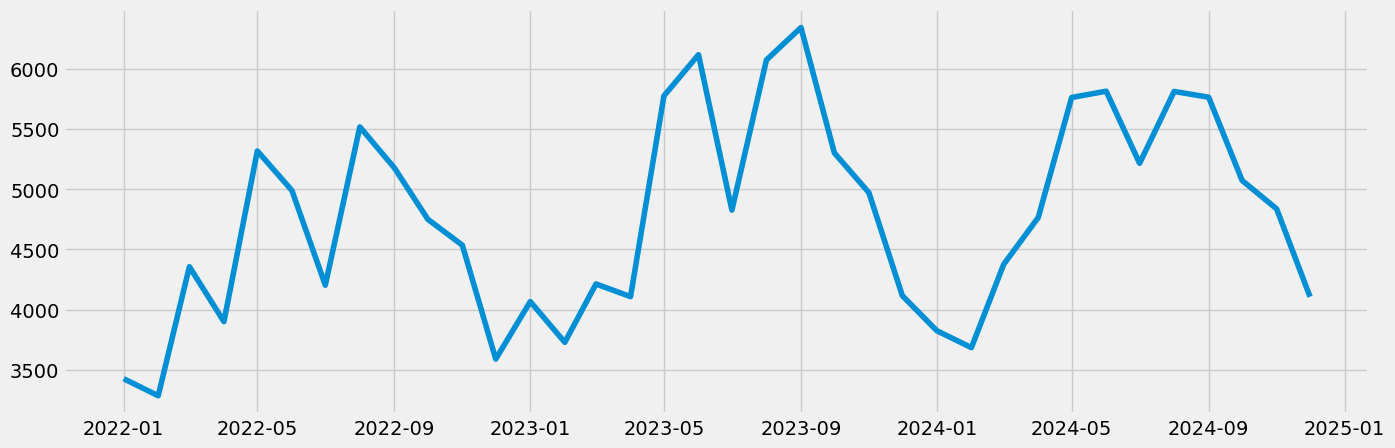

In [87]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(monthly)

In [88]:
# Check for missing values (you shouldn't have any)

monthly.isnull().sum() 

accidents    0
dtype: int64

In [89]:
# Check for duplicates

dups = monthly.duplicated()
dups.sum()

# No dups!

np.int64(0)

### Time-series analysis: decomposition

In [90]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(monthly, model='additive')

In [91]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

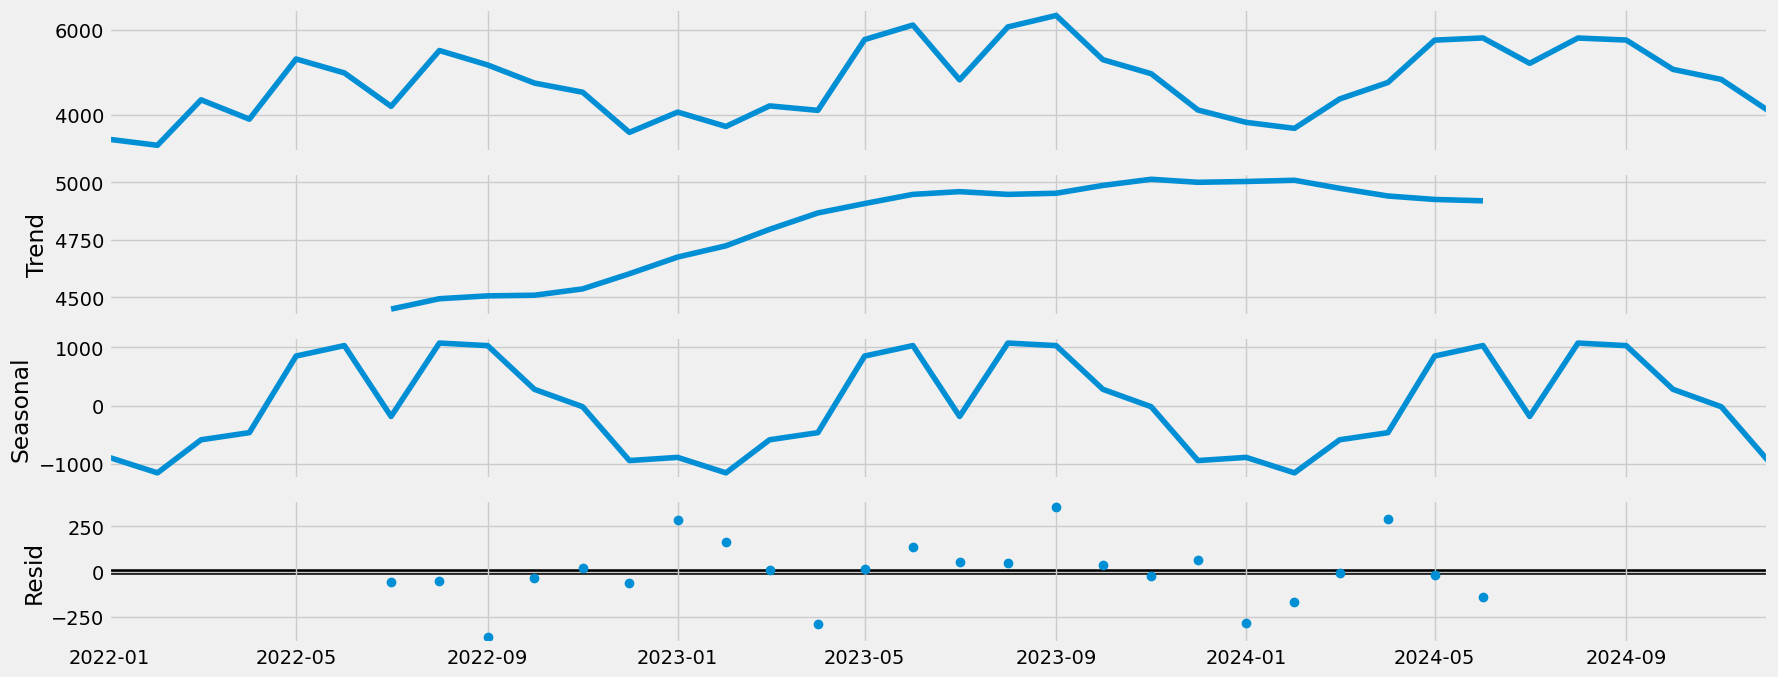

In [92]:
# Plot the separate components

decomposition.plot()
plt.show()

The seasonal decomposition separates the monthly accident counts in NRW into  three components: trend, seasonality, and residual.
The trend component shows a gradual increase in accidents from early 2022 through mid-2023, followed by a slight stabilization and decline toward the end of 2024.
This suggests that accident levels generally rose over the observed period before leveling off.The seasonal component shows a clear recurring yearly pattern: accidents are consistently higher during the summer months (June–August) and lower during the winter months (December–February). This is likely influenced by increased travel activity and tourism in the summer, and reduced travel in colder months.
The residual component fluctuates around zero with no obvious pattern, indicating that most of the systematic variation in the data is successfully captured by the trend and seasonal components. The remaining noise likely reflects short-term, irregular factors such as weather events or isolated traffic disruptions.

### Testing for stationarity

In [93]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(monthly['accidents'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.920131
p-value                         0.001892
Number of Lags Used             5.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


Our Dickey_fuller test results shows that p-value = 0.001 which is smaller than 0.05, whereas Test Statistic = -3.92 < Critical value(5%) = -2.96 which allows us to reject our null hypothesis of "presence of unit root" or in simple words"our data is non-stationary",and conclude that our data is stationary.

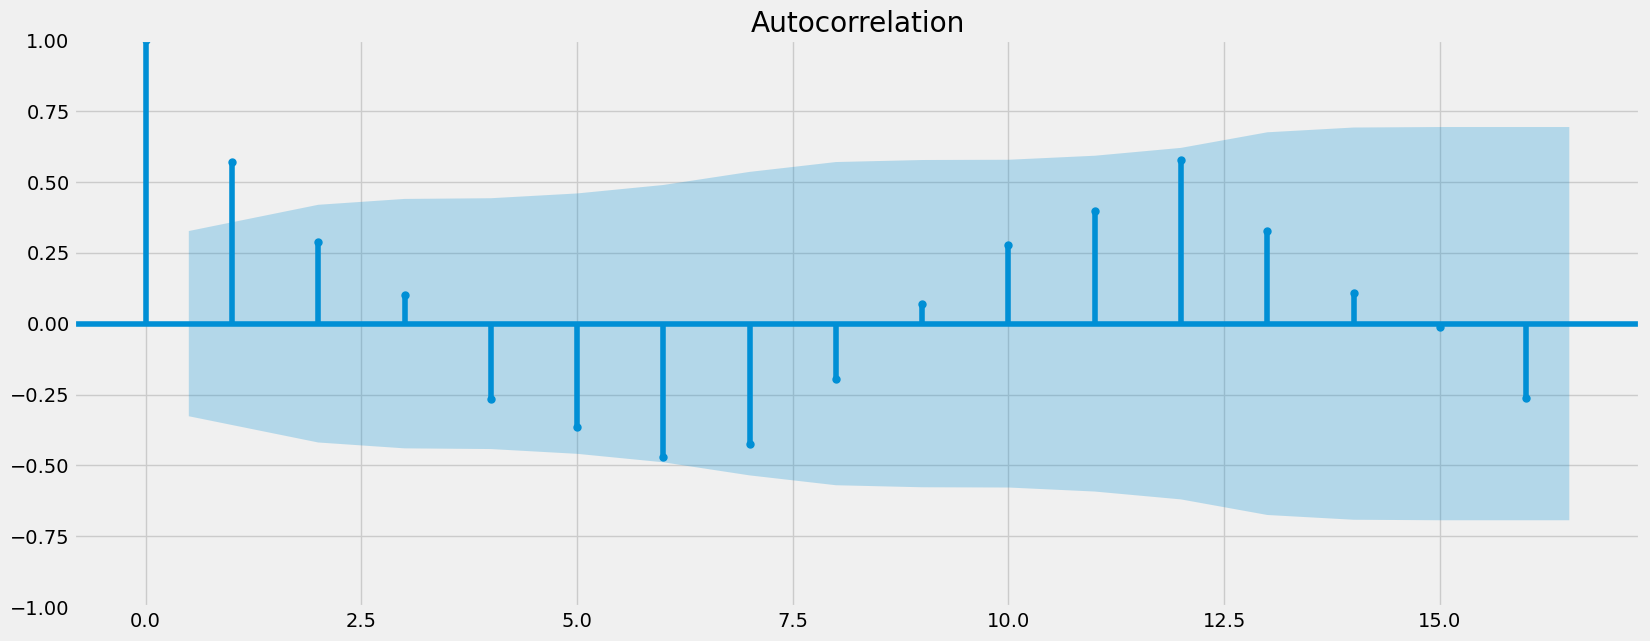

In [94]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(monthly)
plt.show()

### Forecasting

The Dickey-Fuller test indicates that the series is stationary (p < 0.05), so no non-seasonal differencing is required and therefore d = 0. However, the seasonal decomposition revealed a strong annual seasonal pattern, so one seasonal differencing step is needed. Therefore, instead of an ARMA model, a SARIMA model is appropriate, parameterized as SARIMA(p, 0, q)(P, 1, Q, 12).


<Figure size 1000x400 with 0 Axes>

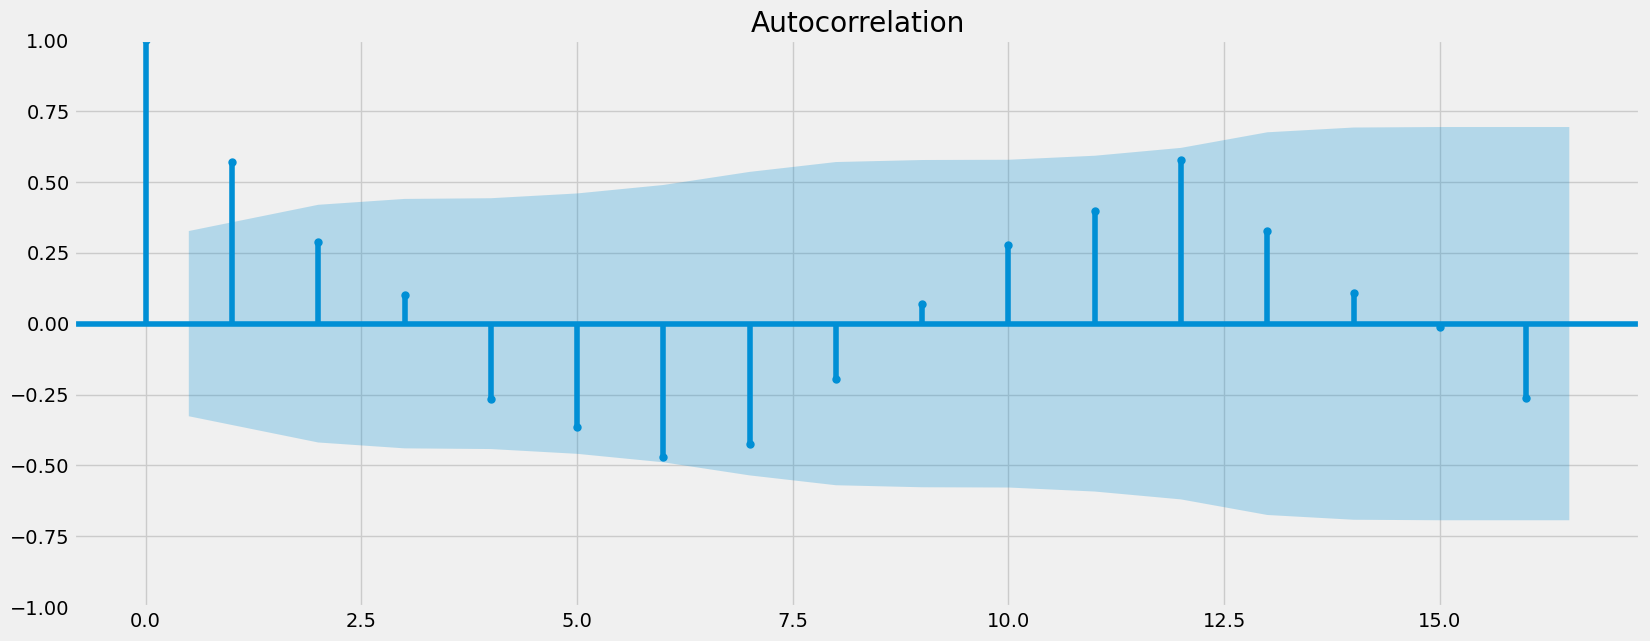

<Figure size 1000x400 with 0 Axes>

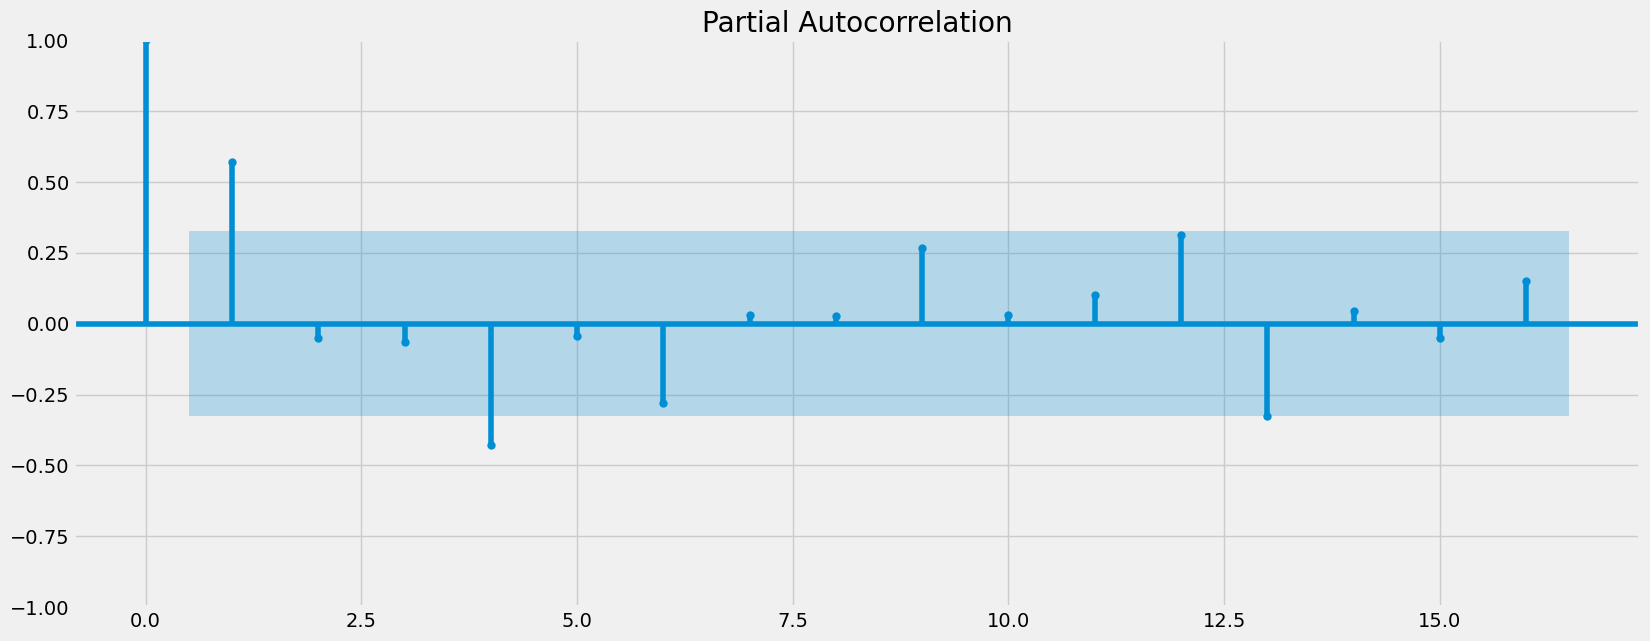

In [95]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plot_acf(monthly['accidents'])
plt.show()

plt.figure(figsize=(10,4))
plot_pacf(monthly['accidents'])
plt.show()


In our ACF plot we can see that there is a strong spike at lag 1, lag 2 is weaker and does not represent a clean cutoff.The rest taper gradually which is typical of MA(1) hence q = 1. We also see a spike at lag 12 which shows seasonal noise hence Q = 1.
In our PACF plot we can see that there is a strong spike at lag 1 then values drop inside the shaded region which means AR (p) = 1. We also see a seasoanl spike at lag 12 which shows an yearly AR effect hence P = 1.
We didnt have to perform any non-seasonal differencing hence d = 0.
We have to apply 1 seasonal difference because yearly seasonality is present hence D = 1.
s = 12 months in yearly seasonal cycle.
ARIMA (p,d,q) = ARIMA(1,0,1)
SARIMA(p,d,q)(P,D,Q,s) = SARIMA(1,0,1)(1,1,1,12)



#### Fitting the model

In [96]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(monthly['accidents'],
                order=(1, 0, 1),
                seasonal_order=(1, 1, 1, 12))

results = model.fit()
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                          accidents   No. Observations:                   36
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -174.738
Date:                            Sat, 01 Nov 2025   AIC                            359.476
Time:                                    21:00:02   BIC                            365.367
Sample:                                01-01-2022   HQIC                           361.039
                                     - 12-01-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2554      0.314     -0.812      0.417      -0.872       0.361
ma.L1          0.7976      0.190   

The SARIMA(1,0,1)(1,1,1,12) model was fitted to the monthly accident data.The MA(1) term was statistically significant (p < 0.001), indicating that short-term unexpected fluctuations in one month influence the accident count in the following month.The AR(1) and seasonal AR/MA terms were not statistically significant, suggesting that month-to-month momentum and direct one-year seasonal effects are weaker in this dataset.
Model diagnostics (Ljung-Box p = 0.41, JB p = 0.71) indicate that the residuals are uncorrelated and normally distributed, confirming that the model provides a reasonable fit.


#### Forecasting

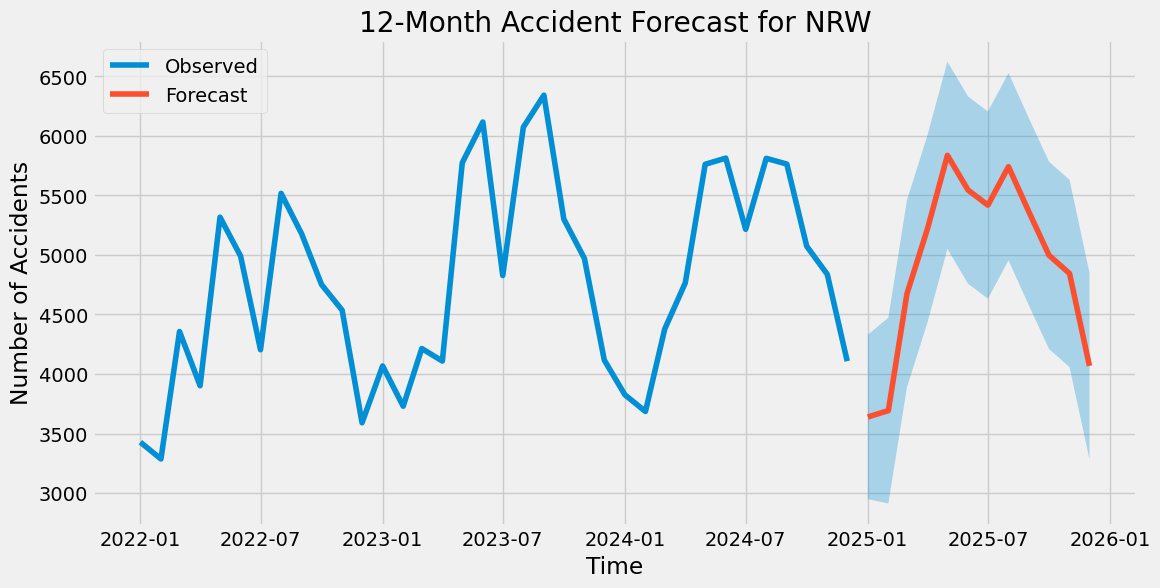

In [97]:
forecast = results.get_forecast(steps=12)
forecast_ci = forecast.conf_int()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly.index, monthly['accidents'], label='Observed')
plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast')
plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:,0],
                 forecast_ci.iloc[:,1], alpha=0.3)
plt.title("12-Month Accident Forecast for NRW")
plt.xlabel("Time")
plt.ylabel("Number of Accidents")
plt.legend()
plt.savefig("NRW_Accident_Forecast.png", dpi=300, bbox_inches='tight')

plt.show()


The 12-month SARIMA forecast indicates that the seasonal pattern in road accidents is expected to continue throughout 2025. Accident counts are forecasted to be lower in the winter months, increase gradually during the spring, and peak in the summer, before declining again toward the end of the year. This pattern is consistent with the seasonal trends observed in previous years. There is no strong evidence of a long-term upward or downward trend, suggesting that the overall accident rate in NRW remains relatively stable. The confidence interval widens over time, reflecting greater uncertainty in long-term predictions.


Used Chatgpt for understanding, coding and interpretation of SARIMA model.